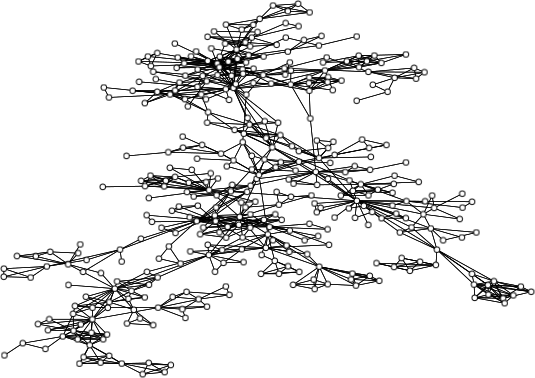

In [74]:
using PyPlot
include("utils.jl")
using DiffusionTutorialUtilities
utils = DiffusionTutorialUtilities
A,xy = utils.load_graph_and_coords("newman-netsci")
utils.cgraphplot(A,xy,filled=false)

In [75]:
include("diffusions.jl")
using DiffusionAlgorithms

In [76]:
lam1 = real(eigs(A)[1][1])

10.375458631159697

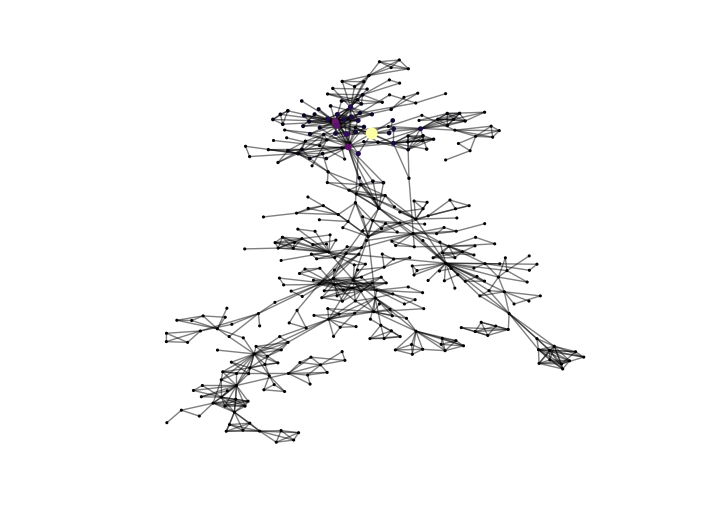

PyObject <matplotlib.collections.PathCollection object at 0x31edb0310>

In [77]:
function single_seed_katz(A,alpha,lam1,seed)
    n = size(A,1)
    @assert 1 <= seed <= n
    v = zeros(size(A,1))
    v[seed] = (1.-alpha)
    x = (eye(n) - alpha*(1/lam1)*A) \ v
end
x = single_seed_katz(A,0.85,lam1,1)
utils.graphplot(A,xy)
scatter(xy[:,1],xy[:,2],400*x+5,400*x,edgecolor="None",cmap="inferno")

In [78]:
using Interact

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.49,"alpha",0.49,0.0:0.01:0.99)

Interact.Slider{Int64}([Reactive.Input{Int64}] 190,"seed",190,1:379)

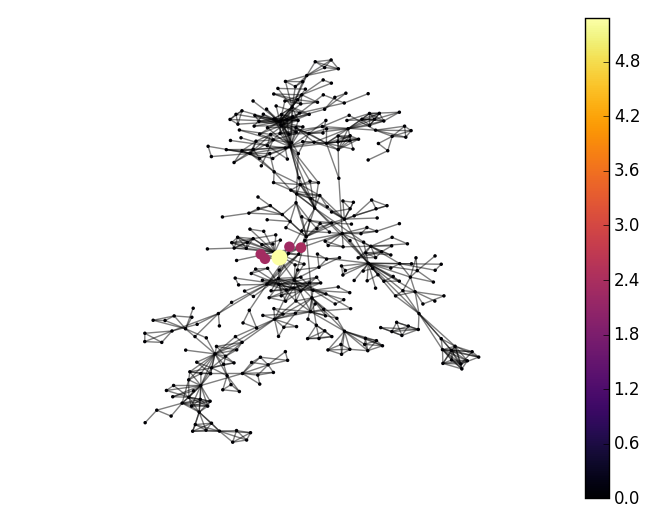

In [79]:
n = size(A,1)
f = figure()
@manipulate for alpha=0:0.01:0.99, seed=1:n; withfig(f) do
        x = single_seed_katz(A,alpha,lam1,seed)
        utils.graphplot(A,xy)
        scatter(xy[:,1],xy[:,2],25*max(log(n*x),0.25),max(log(n*x),0),edgecolor="None",cmap="inferno")
        axis("off")
        colorbar()
        #clim([0,sqrt(n)])
    end   
end    

In [11]:
close("all")

Interact.Options{:ToggleButtons,Float64}([Reactive.Input{Float64}] 0.999,"alpha",0.999,"0.999",Interact.OptionDict(Any["0.999","0.995","0.99","0.95","0.9","0.85","0.8","0.75","0.66","0.5","0.25","0.1"],Dict{Any,Any}("0.99"=>0.99,"0.95"=>0.95,"0.9"=>0.9,"0.8"=>0.8,"0.25"=>0.25,"0.75"=>0.75,"0.66"=>0.66,"0.85"=>0.85,"0.5"=>0.5,"0.1"=>0.1,"0.995"=>0.995,"0.999"=>0.999)),Any[],Any[])

Interact.Slider{Int64}([Reactive.Input{Int64}] 190,"seed",190,1:379)

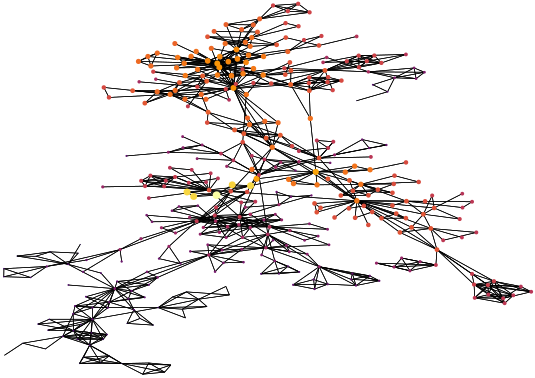

In [81]:
include("diffusions.jl")
include("utils.jl")
using DiffusionAlgorithms
using DiffusionTutorialUtilities

A,xy = utils.load_graph_and_coords("newman-netsci");
n = size(A,1)
# chebyshev point set of alphas
N=15; alphas = [0.999,0.995,0.99,0.95,0.9,0.85,0.8,0.75,0.66,0.5,0.25,0.1]
@manipulate for alpha=alphas, seed=1:n
    @time x = DiffusionAlgorithms.single_seed_katz_power(A,alpha,lam1,seed)
    @show extrema(x), 1/n
    @show "here"
    utils.cgraphplot(A,xy,0.05*log(1/minimum(x)*x),log(1/minimum(x)*x),utils._inferno_data)
end   

Interact.Options{:ToggleButtons,Float64}([Reactive.Input{Float64}] 0.999,"alpha",0.999,"0.999",Interact.OptionDict(Any["0.999","0.995","0.99","0.95","0.9","0.85","0.8","0.75","0.66","0.5","0.25","0.1","0.01","0.001"],Dict{Any,Any}("0.99"=>0.99,"0.95"=>0.95,"0.9"=>0.9,"0.8"=>0.8,"0.25"=>0.25,"0.75"=>0.75,"0.66"=>0.66,"0.85"=>0.85,"0.5"=>0.5,"0.1"=>0.1,"0.01"=>0.01,"0.995"=>0.995,"0.001"=>0.001,"0.999"=>0.999)),Any[],Any[])

Interact.Slider{Int64}([Reactive.Input{Int64}] 1500,"seed",1500,1:3000)

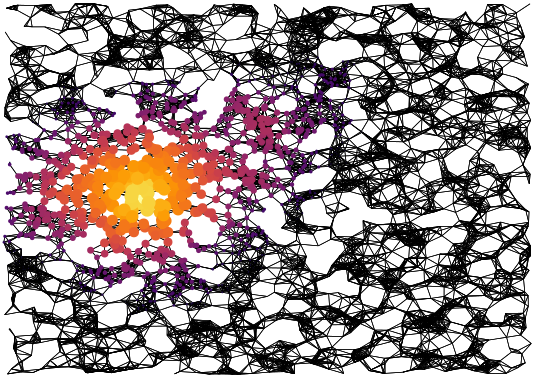

0.080722 seconds (34.81 k allocations: 1.741 MB)
extrema(x) = (6.025341743901221e-24,0.0010872633021897504)
"done alpha=$(alpha), seed=$(seed)" = "done alpha=0.999, seed=1500"


In [83]:
include("diffusions.jl")
include("utils.jl")
using DiffusionAlgorithms
using DiffusionTutorialUtilities

A,xy = utils.load_graph_and_coords("U3A");
lam1 = real(eigs(A)[1][1])
n = size(A,1)
# chebyshev point set of alphas
alphas = ([0.999,0.995,0.99,0.95,0.9,0.85,0.8,0.75,0.66,0.5,0.25,0.1,0.01,0.001])
@manipulate for alpha=alphas, seed=1:n
    @time x = DiffusionAlgorithms.single_seed_katz_power(A,alpha,lam1,seed)
    @show extrema(x)
    @show "done alpha=$(alpha), seed=$(seed)"
    utils.cgraphplot(A,xy,0.1*log(1/(max(minimum(x),1.e-12))*x),log(x+1.e-12),
        utils._inferno_data)
end   

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.49,"alpha",0.49,0.0:0.01:0.99)

Interact.Slider{Int64}([Reactive.Input{Int64}] 1500,"seed",1500,1:3000)

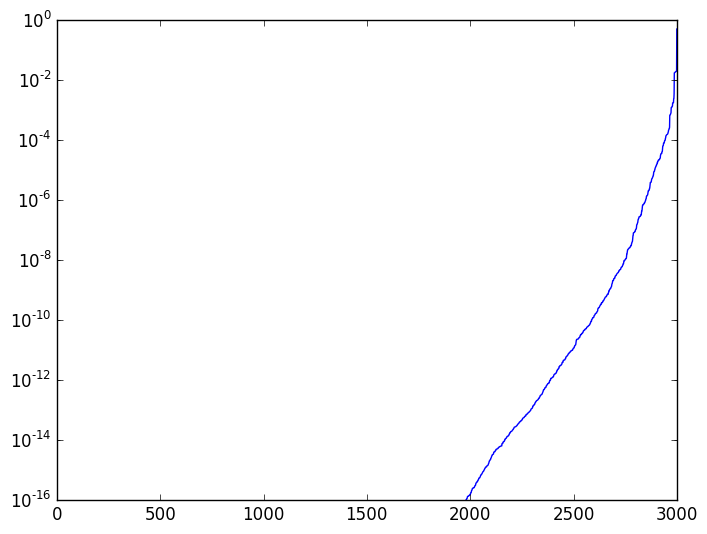

0.030427 seconds (34.81 k allocations: 1.741 MB)


In [70]:
include("diffusions.jl")
include("utils.jl")
using DiffusionAlgorithms
using DiffusionTutorialUtilities

A,xy = utils.load_graph_and_coords("U3A");
lam1 = real(eigs(A)[1][1])
# chebyshev point set of alphas
alphas = ([0.999,0.995,0.99,0.95,0.9,0.85,0.8,0.75,0.66,0.5,0.25,0.1,0.01,0.001])
f = figure()
@manipulate for alpha=0:0.01:0.99, seed=1:n; withfig(f) do
        @time x = DiffusionAlgorithms.single_seed_katz_power(A,alpha,lam1,seed)
        semilogy(sort(x))
        ylim([1.e-16,1])
    end
end 

In [43]:
    @time x = DiffusionAlgorithms.single_seed_katz_power(A,0.999,lam1,1)

3000-element Array{Float64,1}:
 0.00105623 
 7.91998e-18
 1.48556e-23
 1.43691e-21
 2.56202e-12
 1.05459e-25
 2.20192e-16
 3.3917e-18 
 1.00818e-8 
 2.55939e-8 
 1.15755e-15
 1.89675e-23
 4.36421e-27
 ⋮          
 2.12484e-16
 8.64078e-23
 1.09217e-20
 2.90384e-25
 4.41224e-22
 6.49184e-23
 4.03956e-21
 6.73842e-17
 1.49052e-12
 1.69338e-22
 8.29864e-20
 2.8373e-13 

0.006953 seconds (24 allocations: 47.953 KB)
